# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [47]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [48]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return ((x**2)*(numpy.sin(x)))

Ensure your function works with numpy arrays:

In [49]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [50]:
def g(x):
    '''Analytical integral of f(x).'''
    a = (2*x*(numpy.sin(x)))
    b = (((x**2)-2)*(numpy.cos(x)))
    c = 2
    
    return (a-b-c)

Check your solution with the same numpy array:

In [51]:
assert g(0) == 0.

In [52]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [53]:
def integrate_analytic(xmin, xmax):
    r = g(xmax)
    t = g(xmin)
    
    return (r-t)

Check your analytic function:

In [54]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [55]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    
    xs = numpy.linspace(xmin, xmax, N+1)
    deltax = xs[1]-xs[0]
    almost_total = 0

    for i in range(0, (len(xs))):
        if i == 0:
            fxi = f(xs[i])
            #fmi = f(((xs[i])+(xs[i-1]))/2)
            #fxi_1 = f(xs[i+1])
                    
            almost_total += (fxi)
        elif i == (len(xs)-1):
            fxi = f(xs[i])
            fmi = f(((xs[i])+(xs[i-1]))/2)
            #fxi_1 = f(xs[i+1])
                       
            almost_total += ((4*fmi)+((fxi)))
        else:
            fxi = f(xs[i])
            fmi = f(((xs[i])+(xs[i-1]))/2)
            #fxi_1 = f(xs[i+1])
        
            almost_total += ((4*fmi)+(2*(fxi)))
    return ((deltax/6)*almost_total)

Make sure you have implemented Simpson's rule correctly:

In [56]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [57]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


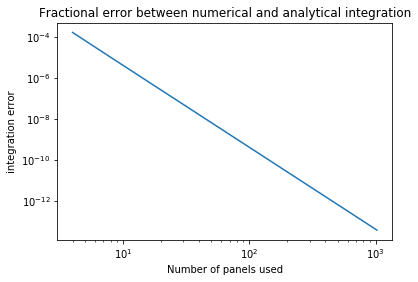

In [58]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
new_lst = [integrate_numeric(x0, x1, i) for i in panel_counts]
errors_lst = [abs((new_lst[i]-result_analytic)/(result_analytic)) for i in range(len(new_lst))]

plt.plot(panel_counts, errors_lst)

plt.xlabel("Number of panels used")
plt.ylabel("integration error")
plt.title("Fractional error between numerical and analytical integration")
plt.yscale('log')
plt.xscale('log')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Generally, by increasing the number of panels used the integration error decreases as 1 over the fourth power of the number of panels used (so the accuracy is increased). However, if too many panels are used then we lose accuracy as the computer can only store a finite number of decimal places, i.e. we encounter numerical "round-off" errors.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

If the trapezium rule was used then the integration error would decrease as 1 over the second power of the number of panels used, i.e. it decreases 100 times slower than when using Simpson's rule. Thus, for a given panel count the accuracy using the trapezium rule would be worse than if Simpson's rule was used.